In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from imblearn.combine import SMOTETomek
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('spamcollection', sep='\t', names=['label', 'text'])

In [3]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data cleaning and preprocessing

In [4]:
stemmer = PorterStemmer()
sentences = []
for i in range(len(data)):
    sentence2word = re.sub('[^a-zA-Z]', ' ', data['text'][i]).lower().split()
    sentence = " ".join([stemmer.stem(word) for word in sentence2word if word not in stopwords.words('english')])
    sentences.append(sentence)

Creating bag of words 

In [5]:
cv = CountVectorizer()
BOW = cv.fit_transform(sentences).toarray()
BOW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
label = pd.get_dummies(data['label'], drop_first=True)
label

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [7]:
label.value_counts()

spam
0       4825
1        747
dtype: int64

<AxesSubplot:>

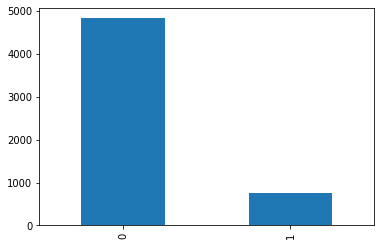

In [8]:
pd.value_counts(label['spam']).plot(kind='bar')

In [9]:

smote = SMOTETomek()
x, y = smote.fit_resample(BOW, label)

<AxesSubplot:>

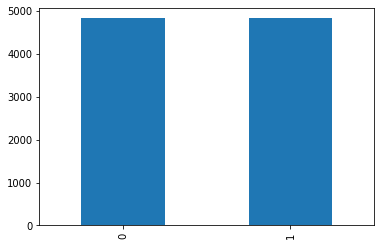

In [10]:
pd.value_counts(y['spam']).plot(kind='bar')

In [11]:
x, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       spam
 0        0
 1        0
 2        1
 3        0
 4        0
 ...    ...
 9645     1
 9646     1
 9647     1
 9648     1
 9649     1
 
 [9650 rows x 1 columns])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(x_train), len(x_test)

(7720, 1930)

In [13]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train['spam'])

MultinomialNB()

In [14]:
predicted = classifier.predict(x_test)
predicted, y_test

(array([1, 0, 0, ..., 1, 0, 0], dtype=uint8),
       spam
 8877     1
 3074     0
 1354     0
 2642     1
 6836     1
 ...    ...
 6200     1
 8934     1
 8740     1
 2602     0
 3156     0
 
 [1930 rows x 1 columns])

In [15]:
accuracy_score(y_test, predicted)

0.8797927461139896

In [16]:
cm = confusion_matrix(y_test, predicted)
cm

array([[910,  23],
       [209, 788]], dtype=int64)

<AxesSubplot:>

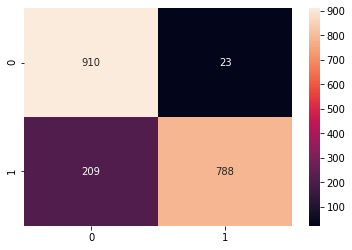

In [17]:
sns.heatmap(cm, annot=True, fmt='.3g')

Testing my own data

In [18]:
val = 'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'
sen = []
cleaning = re.sub('[^a-zA-Z]', ' ', val).lower().split()
sentence = " ".join([stemmer.stem(word) for word in cleaning if word not in stopwords.words('english')])
sen.append(sentence)
sen

['urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw']

In [19]:
x = cv.transform(sen).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
pred = classifier.predict(x)
if pred == 1:
    print("spam")
else:
    print("Not a spam")

spam
